# Airline Safety Analysis

Column Details"

* `id` : Unique id number to each passenger.
* `Gender`: Gender of the passengers (Female, Male)
* `Customer Type`: The customer type (Loyal customer, disloyal customer)
* `Age`: The actual age of the passengers
* `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* `Flight distance`: The flight distance of this journey
* `Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient
* `Ease of Online booking`: Satisfaction level of online booking
* `Gate location`: Satisfaction level of Gate location
* `Food and drink`: Satisfaction level of Food and drink
* `Online boarding`: Satisfaction level of online boarding
* `Seat comfort`: Satisfaction level of Seat comfort
* `Inflight entertainment`: Satisfaction level of inflight entertainment
* `On-board service`: Satisfaction level of On-board service
* `Leg room service`: Satisfaction level of Leg room service
* `Baggage handling`: Satisfaction level of baggage handling
* `Check-in service`: Satisfaction level of Check-in service
* `Inflight service`: Satisfaction level of inflight service
* `Cleanliness`: Satisfaction level of Cleanliness
* `Departure Delay in Minutes`: Minutes delayed when departure
* `Arrival Delay in Minutes`: Minutes delayed when Arrival
* `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_summary import DataFrameSummary

In [31]:
df = pd.read_csv("Airline_Safety_Analysis.csv")
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [32]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [33]:
# Drop the column ‘Unnamed’
df.drop("Unnamed: 0", axis=1, inplace=True)

In [34]:
# Replace all the “ “ in column with “_”
df.columns = [each.replace(" ","_") for each in df.columns]

In [35]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<AxesSubplot:>

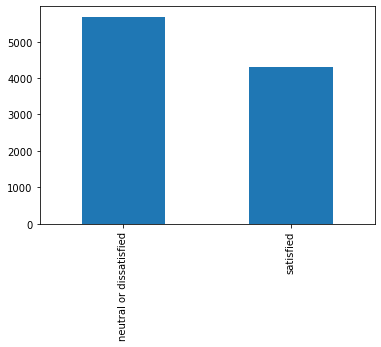

In [36]:
#Plot the number of satisfied customers and the number of unsatisfied customers
df["satisfaction"].value_counts().plot(kind='bar')

In [37]:
df["satisfaction"]=[1 if each == "satisfied" else 0 for each in df.satisfaction]

In [38]:
# Plot the mean value of satisfaction of male and female customers
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.438062
0,Female,0.424432


In [39]:
# Plot the mean value of satisfaction of customers with respect to Age.
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


In [40]:
# Plot the mean value of satisfaction of customers with respect to Food_and_drink.
df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
0,0,0.625000
5,5,0.566176
4,4,0.515050
3,3,0.404990
2,2,0.362305
1,1,0.198142


<AxesSubplot:>

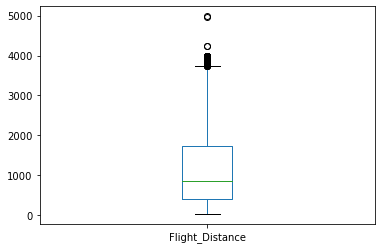

In [41]:
# Display a boxplot for Flight_Distance
df["Flight_Distance"].plot(kind='box')

<AxesSubplot:>

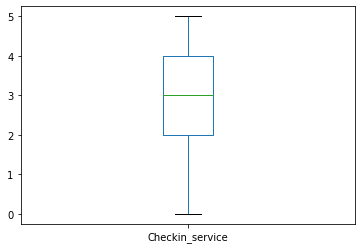

In [42]:
# Display a boxplot for Checkin_service
df["Checkin_service"].plot(kind='box')

In [43]:
# Find all the Null values
df.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [44]:
# Drop all the NA values
df.dropna(axis=0, inplace=True)

In [45]:
# Find the unique values in Flight_Distance
df.Flight_Distance.unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [46]:
# Make a correlation matrix
df.corr()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
id,1.000000,0.001466,0.098877,-0.024501,0.002036,0.005660,-0.000680,0.013551,0.044263,0.048669,0.009676,0.064570,0.035752,0.079262,0.081499,0.093300,0.033498,-0.001238,-0.018544,0.010498
Age,0.001466,1.000000,0.090591,0.011665,0.041773,0.017286,0.001106,0.044591,0.207753,0.181273,0.080812,0.039967,0.038222,-0.055095,0.030486,-0.058983,0.071391,-0.020710,-0.022688,0.129920
Flight_Distance,0.098877,0.090591,1.000000,0.015847,-0.008307,0.071344,0.017262,0.076893,0.214324,0.154973,0.138503,0.107969,0.129176,0.069815,0.054031,0.059071,0.099251,0.015525,0.010830,0.297406
Inflight_wifi_service,-0.024501,0.011665,0.015847,1.000000,0.337787,0.699705,0.332965,0.134215,0.456359,0.132321,0.217305,0.116497,0.169469,0.123457,0.028965,0.114022,0.136973,-0.007843,-0.011171,0.282832
Departure/Arrival_time_convenient,0.002036,0.041773,-0.008307,0.337787,1.000000,0.442137,0.454169,-0.011349,0.064957,0.010016,-0.012338,0.068046,0.021743,0.065922,0.078829,0.061636,0.004338,0.005797,0.002589,-0.058480
Ease_of_Online_booking,0.005660,0.017286,0.071344,0.699705,0.442137,1.000000,0.465224,0.034254,0.398006,0.038002,0.054229,0.034278,0.106125,0.037558,-0.000779,0.037790,0.020202,0.000291,-0.004231,0.162764
Gate_location,-0.000680,0.001106,0.017262,0.332965,0.454169,0.465224,1.000000,-0.008743,-0.007409,0.003925,0.007955,-0.019461,-0.017742,0.006024,-0.046184,-0.000451,-0.005736,-0.000836,-0.002641,-0.001157
Food_and_drink,0.013551,0.044591,0.076893,0.134215,-0.011349,0.034254,-0.008743,1.000000,0.261399,0.587766,0.626296,0.056966,0.042764,0.020090,0.081636,0.027575,0.663595,-0.001651,-0.005510,0.229629
Online_boarding,0.044263,0.207753,0.214324,0.456359,0.064957,0.398006,-0.007409,0.261399,1.000000,0.431019,0.301528,0.143580,0.131011,0.086898,0.184325,0.079834,0.346535,-0.008138,-0.010210,0.497323
Seat_comfort,0.048669,0.181273,0.154973,0.132321,0.010016,0.038002,0.003925,0.587766,0.431019,1.000000,0.613936,0.128036,0.110143,0.062437,0.176497,0.063859,0.686242,-0.005441,-0.007115,0.351979


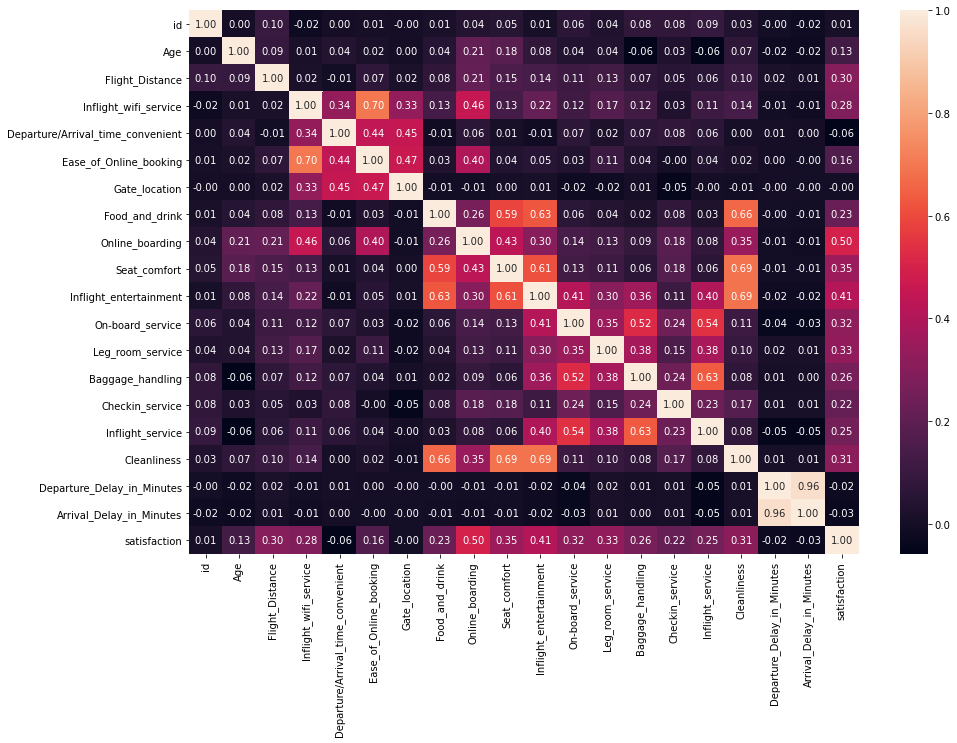

In [47]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f")

## Model Intialization

In [48]:
#Perform encoding in columns Gender, Customer_Type, Type_of_Travel, and Class.
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[['Gender','Customer_Type','Type_of_Travel','Class']] = df[['Gender','Customer_Type','Type_of_Travel','Class']].apply(labelencoder.fit_transform)

In [49]:
#Drop the column id
df.drop("id", axis=1, inplace=True)

In [50]:
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,1,0,38,0,0,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,1,0,52,0,0,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


### Scaling on feature column

In [51]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

df[["Age","Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]] = standardscaler.fit_transform(df[["Age","Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]])

In [52]:
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,-1.739013,1,2,-0.737519,3,4,3,1,...,5,4,3,4,4,5,5,0.267269,0.071064,0
1,1,1,-0.945477,0,0,-0.962124,3,2,3,3,...,1,1,5,3,1,4,1,-0.360223,-0.238149,0
2,0,0,-0.879349,0,0,-0.056715,2,2,2,2,...,5,4,3,4,4,4,5,-0.386368,-0.392755,1
3,0,0,-0.945477,0,0,-0.635698,2,5,5,5,...,2,2,5,3,1,4,2,-0.098768,-0.160845,0
4,1,0,1.435132,0,0,-0.983087,3,3,3,3,...,3,3,4,4,3,3,3,-0.386368,-0.392755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0.707724,0,0,2.395974,3,3,3,3,...,5,5,5,5,5,5,4,-0.072622,0.225670,1
9996,1,0,-0.085813,0,0,2.669493,5,5,5,5,...,4,4,4,4,3,4,5,-0.386368,-0.392755,1
9997,0,0,-0.019685,0,0,-0.878271,4,4,4,4,...,4,4,4,4,3,4,2,-0.386368,-0.392755,1
9998,1,0,0.839980,0,0,0.163897,5,5,5,5,...,4,4,3,4,5,4,5,-0.360223,-0.109310,1


## Create the features and target Data

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop("satisfaction", axis=1)
Y = df.satisfaction

### Split the data in training and testing sets

In [55]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Fit the decision tree model with various parameters

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [57]:
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9197994987468672


In [58]:
#Let's predict out X_test data
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
Y_test[:10]

9488    0
5183    0
7127    0
107     0
3429    1
39      0
6414    0
4544    0
7879    0
2560    0
Name: satisfaction, dtype: int64

In [60]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_pred, Y_test)),
               columns =['Predicted', 'Actual'])
comparison[:10]

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
# A function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def evaluate_preds(Y_test, Y_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)
    metrics_dict = {"accuracy:": round(accuracy, 2),
                    "precision:": round(precision, 2),
                    "recall:": round(recall, 2),
                    "f1:": round(f1, 2),}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    print("\n")
    print("------------------------")
    print(f"Confusion matrix:\n{conf_matrix}");
    print("\n")
    print("------------------------")
    print(f"Classification Report:\n{class_report}");
    
    return metrics_dict

In [65]:
evaluate_preds(Y_test, Y_pred)

Accuracy:91.98%
precision:0.91
Recall:0.91
F1 score:0.91


------------------------
Confusion matrix:
[[1051   81]
 [  79  784]]


------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1132
           1       0.91      0.91      0.91       863

    accuracy                           0.92      1995
   macro avg       0.92      0.92      0.92      1995
weighted avg       0.92      0.92      0.92      1995



{'accuracy:': 0.92, 'precision:': 0.91, 'recall:': 0.91, 'f1:': 0.91}